In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## • analyze only the users and not the admins
## • you can choose the color palette that you like for both of the graphs that you will need to draw in this exercise
## • use the table checker for your query
## • use absolute values of the commits, not the averages
## • sort the dataframes by the total number of commits made by a user

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query1 = """
        SELECT timestamp, uid
        FROM checker
        WHERE uid LIKE 'user_%'
        """
df = pd.io.sql.read_sql(query1, con, parse_dates='timestamp')
df2 = df.copy()
df['day'] = df['timestamp'].dt.dayofweek
df = df.groupby(['uid', 'day']).count().reset_index()
re = df.copy()
df

,uid,day,timestamp
0,user_0,0,3
1,user_1,2,1
2,user_1,3,39
3,user_1,5,1
4,user_1,6,43
...,...,...,...
133,user_7,1,5
134,user_7,2,3
135,user_8,3,15
136,user_8,5,46


In [3]:
df2['time'] = df2['timestamp'].dt.hour
df2 = df2.groupby(['uid', 'time']).count().reset_index()
df2.loc[len(df2.index)] = ['user_1', 2, 0]
df2.loc[len(df2.index)] = ['user_1', 4, 0]
df2

,uid,time,timestamp
0,user_0,17,3
1,user_1,12,1
2,user_1,16,1
3,user_1,17,8
4,user_1,19,21
...,...,...,...
305,user_8,19,7
306,user_8,20,1
307,user_8,21,3
308,user_1,2,0


In [4]:
re = re.groupby('uid').agg({'timestamp': 'sum'})
re = re.sort_values('timestamp', ascending=False).reset_index()
list_user = re['uid'].tolist()
list_user

['user_4',
 'user_14',
 'user_2',
 'user_25',
 'user_19',
 'user_26',
 'user_20',
 'user_31',
 'user_10',
 'user_3',
 'user_29',
 'user_13',
 'user_28',
 'user_24',
 'user_12',
 'user_8',
 'user_1',
 'user_21',
 'user_30',
 'user_18',
 'user_17',
 'user_16',
 'user_27',
 'user_15',
 'user_6',
 'user_7',
 'user_22',
 'user_11',
 'user_23',
 'user_0']

In [5]:
df2 = pd.pivot(df2, index='time', columns='uid', values='timestamp')
df2 = df2.fillna(0)
df2 = df2.reindex(list_user, axis=1)
df2

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
df = pd.pivot(df, index='day', columns='uid', values='timestamp')
df = df.fillna(0)
df = df.reindex(list_user, axis=1)
df

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
day,,,,,,,,,,,,,,,,,,,,,
0,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0
1,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0
2,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
3,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,2.0,0.0,6.0,0.0
4,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
6,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,0.0,1.0,8.0,0.0,0.0


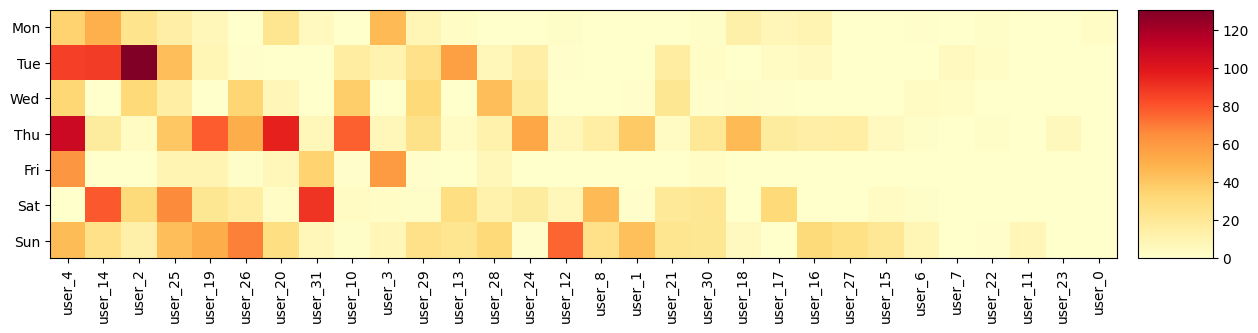

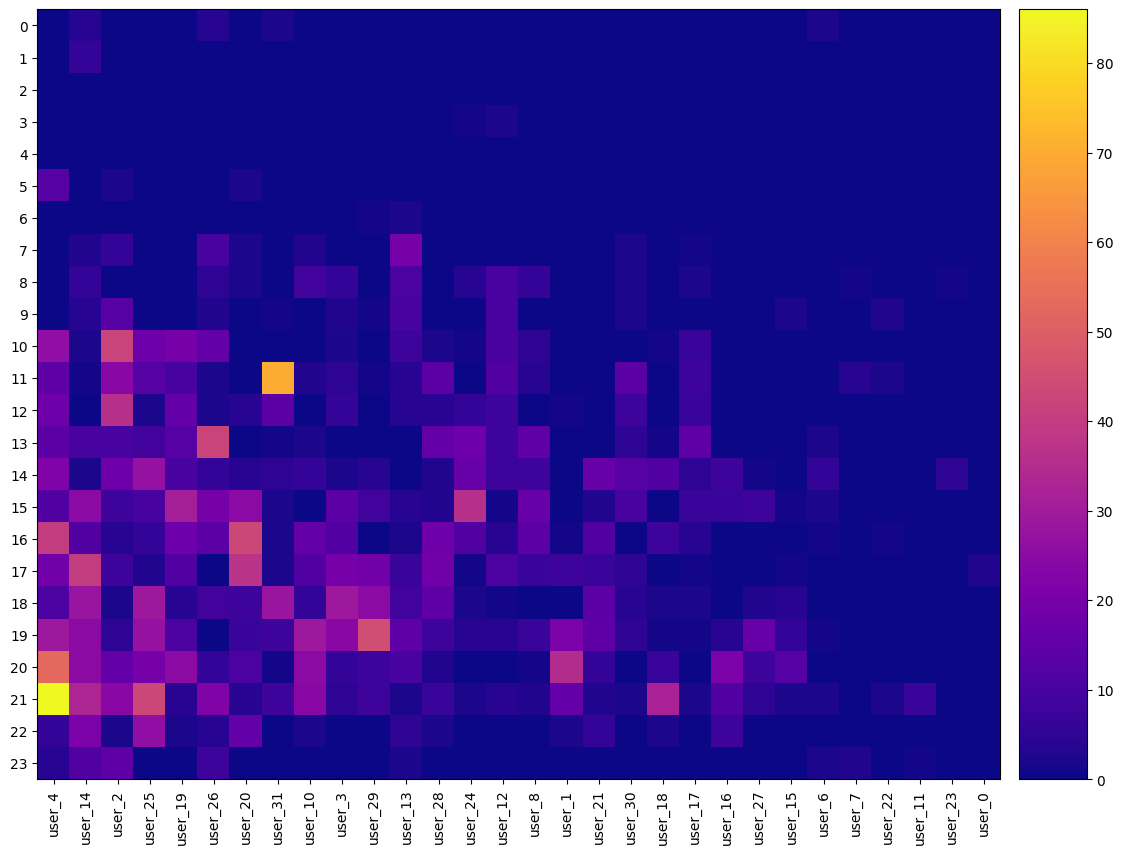

In [7]:
date_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(df, cmap='YlOrRd')
ax.set_xticks(range(0, len(list_user)), list_user, rotation=90)
ax.set_yticks(range(0, len(date_labels)), date_labels)
ax_divider = make_axes_locatable(ax)
cax1 = ax_divider.append_axes('right', size='7%', pad='2%')
cb = fig.colorbar(im, cax=cax1)

fig2, ax2 = plt.subplots(figsize=(15, 10))
im2 = ax2.imshow(df2, cmap='plasma')
ax2.set_xticks(range(0, len(list_user)), list_user, rotation=90)
ax2.set_yticks(range(0, 24))
ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes('right', size='7%', pad='2%')
cb = fig.colorbar(im2, cax=cax2)

## • at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):
◦ “Which user has the most commits on Tue?”
    The answer: user_2.
◦ “Which user has the most commits on Thu?”
    The answer: user_4.
◦ “On which weekday do the users not like making a lot of commits?”
    The answer: Tue.
◦ “Which user at which hour made the largest number of commits?”
    The answer, for example: user_4, 21.

In [8]:
con.close()